# Python Homework 4

**Release date:** Thursday, July 17th <br>
**Due date:** Wednesday, __July 23rd__, 11:59 p.m. via Gradescope

**Instruction:** Please upload your ipynb file on Gradescope with filename "PythonHW4_YOURPERMNUMBER".

__Background:__ Markov chains could be used to model a plethora of phenomena that happen in our world. The only assumption that we would have to accept is the fact that what we are trying to model depends only on the last step, and not on all previous steps (the whole history). 

For example, Sahin and Sen (2001) model hourly wind speeds in a NW part of Turkey as a Markov chain ${(X_n)}_{n\in \mathbb{N}}$ with 7 states representing different wind speed levels. Since in Python arrays are indexed starting from $0$, let us consider the states to be $S=\{0,1,2,3,4,5,6 \}$, with $0$ representing the lowest wind speed level. The transition matrix is given by: 

\begin{gather*}
P=\begin{array}{cccccccc}
& 0 & 1 & 2 & 3 & 4 & 5 & 6 \\
0 & 0.756 & 0.113 & 0.129 & 0.002 & 0 & 0 & 0\\
1 & 0.174 & 0.721 & 0.064 & 0.041 & 0 & 0 & 0\\
2 & 0.141 & 0.001 & 0.776 & 0.082 & 0 & 0 & 0\\
3 & 0.003 & 0 & 0.192 & 0.753 & 0.052 & 0 & 0\\
4 & 0 & 0 & 0.002 & 0.227 & 0.735 & 0.036 & 0\\
5 & 0 & 0 & 0 & 0.007 & 0.367 & 0.604 & 0.022\\
6 & 0 & 0 & 0 & 0 & 0.053 & 0.158 & 0.789\\
\end{array}
\end{gather*}

As usual, we start with loading base packages:

In [1]:
import numpy as np 
import pandas as pd
from numpy import linalg 
import scipy.linalg
import matplotlib.pyplot as plt

### Part a (4 Points)

Implement the transition probability matrix $P$ from above as a two dimensional <tt>numpy.array()</tt>. 

In [2]:
# Initiate the transition matrix P
P = np.array([[0.756, 0.113, 0.129, 0.002, 0.000, 0.000, 0.000],
              [0.174, 0.721, 0.064, 0.041, 0.000, 0.000, 0.000],
              [0.141, 0.001, 0.776, 0.082, 0.000, 0.000, 0.000],
              [0.003, 0.000, 0.192, 0.753, 0.052, 0.000, 0.000],
              [0.000, 0.000, 0.002, 0.227, 0.735, 0.036, 0.000],
              [0.000, 0.000, 0.000, 0.007, 0.367, 0.604, 0.022],
              [0.000, 0.000, 0.000, 0.000, 0.053, 0.158, 0.789]])


Assume that the wind speed in State $i$ is $5 \cdot i$ Miles/hr. So there is no wind in state 0 and 30 M/hr wind in state 6. Given that there is no wind today, find the **expected wind speed** in (i) 3 days' time; (ii) 1 week's time. Be sure to print out any powers of the matrix P that you use to answer the question.

In [3]:
# Want to get from today to 3 days from now, so use 3 step transition matrix

# Calculate 3-step transition matrix by taking the transition matrix to the 3rd power
P_cubed = np.linalg.matrix_power(P, 3)

# Save array as a DataFrame to make it easier to view
df_P_cubed = pd.DataFrame(P_cubed)

# Display transition matrix
df_P_cubed

,0,1,2,3,4,5,6
0,0.518758,1.894953e-01,0.252071,0.038647,0.001024,0.000004,0.000000
1,0.313072,4.192283e-01,0.179421,0.083201,0.005001,0.000077,0.000000
2,0.256733,3.766002e-02,0.546849,0.148934,0.009670,0.000154,0.000000
3,0.067227,4.247597e-03,0.346611,0.489481,0.088476,0.003916,0.000041
4,0.008314,1.568670e-04,0.102354,0.387129,0.450771,0.049589,0.001685
5,0.000587,4.451000e-06,0.020420,0.184623,0.508775,0.253016,0.032573
6,0.000054,1.060000e-07,0.002882,0.042953,0.217323,0.237992,0.498796


In [4]:
# Want to get from today to one week from now, so use 7 step transition matrix

# Calculate 7-step transition matrix by taking the transition matrix to the 7th power
P7 = np.linalg.matrix_power(P, 7)

# Save array as a DataFrame to make it easier to view
df_P7 = pd.DataFrame(P7)

# Display transition matrix
df_P7

,0,1,2,3,4,5,6
0,0.376650,0.180153,0.326155,0.105950,0.010647,0.000437,0.000008
1,0.343285,0.213925,0.300947,0.124483,0.016440,0.000894,0.000026
2,0.298448,0.095575,0.404858,0.173003,0.026504,0.001564,0.000048
3,0.180662,0.039724,0.385334,0.301205,0.084978,0.007686,0.000412
4,0.081876,0.012269,0.269239,0.373016,0.227977,0.032263,0.003360
5,0.036912,0.003917,0.171682,0.353215,0.335347,0.076772,0.022154
6,0.011175,0.000924,0.069168,0.208972,0.335676,0.167201,0.206885


In [5]:
# To get expectation, take the sum of each element in row 0 (since assuming there's no wind today) multiplied by their value
Expectation3 = np.sum(P_cubed[0] * np.arange(7)) # Calculation for expectation after 3 days
ExpectationWeek = np.sum(P7[0] * np.arange(7)) # Calculation for expectation after one week

print("The expected wind speed in 3 days is " + str(round(Expectation3,4)) + " mph")                    
print("The expected wind speed in 1 week is " + str(round(ExpectationWeek,4)) + " mph")                    

The expected wind speed in 3 days is 0.8137 mph
The expected wind speed in 1 week is 1.1951 mph


### Part b (4 Points)

We fix $X_0 = 0$ (no wind today) and wish to compute $H_n := \mathbb{P}(X_n > 4 | X_0 = 0)$ which is the probability that there will be strong wind (level 5 or level 6, over 25 MPH) $n$ days from now. Using a <tt>for</tt> loop, evaluate $H_n$ for $n=1,2,\ldots,60$, i.e for 1,2, and up to 60 days into the future.

Create a plot showing $H_n$ as a function of $n$. **Summarize in 3-4 sentences** what you observe as $n$ increases.

<function matplotlib.pyplot.show(close=None, block=None)>

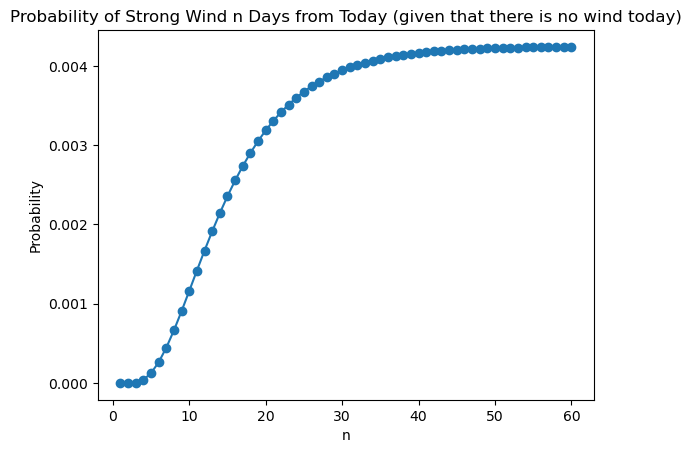

In [6]:
# Evaluate H_n for n = 1, 2,..., 60:
# Create an empty list to store the probability values for each n value
p_list = []

# Iterates for n = 1 to n = 60
for n in range(1, 61):
    # Calculate the n-step matrix
    P_n = np.linalg.matrix_power(P, n) 

    # Sum up values from row 0 that are greater than 4 (level 5 and 6)
    p = np.sum(P_n[0, 5:7]) 

    # Append the probability value to p_list so that it can be plotted as y values
    p_list.append(p)

# WRITE CODE TO PLOT H_n as a function of n

# Plot n as x-axis, p_list as y-axis. Dots at each n value
plt.plot(range(1, 61), p_list, marker = 'o')
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Probability of Strong Wind n Days from Today (given that there is no wind today)') # title of plot
plt.show

**Summary of Observations**:  At lower values of n, the probability of there being strong winds given that today there is no wind is relatively low compared to the other values as expected. However, $H_n$ seems to grow exponentially as n increases, before $H_n$ seems to converge towards a constant which is slightly above 0.004. The shape of the plot seems to follow an S-curve where the growth starts exponential before hitting some ceiling value, suggesting that the long term behavior of the wind speed converges for large n.

### Part c (4 pt)

Let $W$ be the *first* day (i.e. step $n$) that there is NO wind.  Write a function **simulateFirstCalmDay** to do a Monte Carlo simulation of $W$. Starting with **$X_0 = 4$** today, run your function with $M=1000$ simulations to obtain a (i) histogram of $W$; (ii) estimate the expected value of $W$. 

In [62]:
np.random.seed(160)
def simulateFirstCalmDay(M):
    # Create a numpy array to store our W values
    W_values = np.empty(M)

    # Run simulation of W, M times
    for m in range(M):
        
        # Run simulation by first starting at X_0 = 4; establish initial conditions
        current_state = 4 # Starting value of X_0
        n = 0 # Starting value of n
        while True:
            n += 1 # Increase n by 1

            # Given value of current state, determine the next value based on 1 step transition matrix w/ row of the current state as p values
            new_state = np.random.choice(range(0, 7), p = P[current_state])

            # Exit the while loop if we ever hit the state 0, stopping the counter
            if new_state == 0:
                break

            # Otherwise, set current state to new state and run loop again
            else:
                current_state = new_state

        # Append values of W to list
        W_values[m] = n

    return W_values

W_simulations = simulateFirstCalmDay(1000)
W_simulations

array([15., 33., 26., 42., 16.,  7., 15.,  7., 25., 13.,  6., 46., 13.,
       12., 13., 46., 28., 15., 27., 26., 30., 21.,  7., 55., 73., 13.,
       11., 23., 19., 16.,  9., 12.,  5., 12., 32., 16., 11., 19., 28.,
       25., 36., 11., 21., 13.,  7., 10., 23., 10., 14., 17., 27., 13.,
       59.,  8., 61., 13.,  9., 48.,  7.,  2., 16.,  3., 22., 13., 57.,
       13., 18.,  5.,  5., 30.,  7.,  6.,  7., 13., 15., 45., 17., 30.,
       33., 60., 34., 32., 36.,  6., 16., 10., 17., 22., 36., 29.,  7.,
       17., 93., 18., 31., 33., 31., 84., 30., 39.,  5.,  4., 14., 45.,
       32., 15., 24., 14., 18., 14., 23., 19., 19., 11., 35., 31., 37.,
       31., 24., 17., 85.,  7., 17.,  9., 15., 12., 30., 22., 16.,  9.,
       19., 11., 14., 14., 10.,  6., 18., 14., 21., 12., 29.,  3., 20.,
       17., 20., 11., 28.,  5., 16.,  9., 22., 31., 32., 29., 37., 33.,
       42.,  9., 32.,  6., 32.,  4., 13.,  8., 54., 28., 18.,  9., 34.,
       24., 19., 27., 43., 22., 22., 16., 25., 16., 31.,  9., 19

Text(0.5, 1.0, 'Histogram of the values of W')

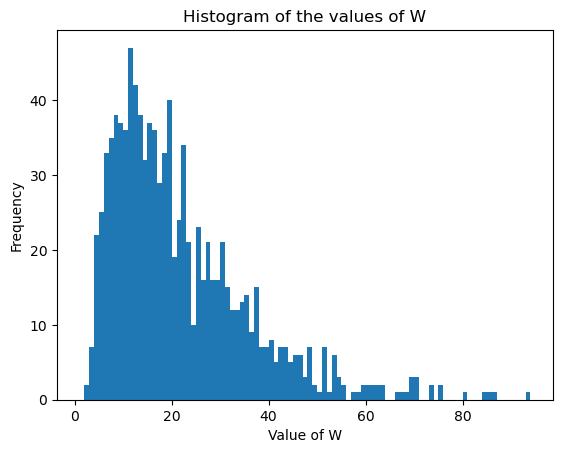

In [84]:
# PLOT THE HISTOGRAM OF W

# Set the bins of the histogram to go from n = 1 to the maximum value of n in the MC simulation of W
bins = range(1, int(np.max(W_simulations)) + 2)

plt.hist(W_simulations, bins = bins)
plt.xlabel('Value of W')
plt.ylabel('Frequency')
plt.title('Histogram of the values of W')

In [87]:
# Calculate the estimated expectation of W by getting the empirical mean of W_simulations
empirical_mean = np.mean(W_simulations)

print(f"The estimated expected value of W is {empirical_mean}")

The estimated expected value of W is 21.246


# Problem 2 (8 points)

You start with **six** dice. Roll all the dice simultaneously and put aside those dice that come up 1 ("snake eyes"). Then, in the second round roll the remaining dice, putting aside those dice that come up 1. And so on, until no dice are left.

Using $10^5$ experiments, estimate the probability that it will take *more than 10 rounds* to end this game.

To do so, set up a Markov Chain $(X_n)$ for the number of dice remaining (so start with $X_0 =6$) and work with the respective transition matrix. Be sure to clearly type out $\mathbf{P}$ as part of your solution. 

Student notes: The sample space is the amount of dice remaining. Since we start with 6, and must end at 0, the sample space $S = \{1,2,3,4,5,6\}$, so the transition matrix is 7 rows by 7 columns. We can get the probability that we go from i dice remaining to j dice remaining by using the binomial distribution. We're rolling i die, and want j die remaining, so we choose j out of i die to survive, with the probability of survival for each die being the same as the probability of not rolling a 1, which is $\frac{5}{6}$. So for the transition matrix, $\mathbf{P}_{ij}=\binom{i}{j}\frac{5}{6}^j\frac{1}{6}^{i-j}$ which corresponds to the pmf of the binomial distribution when accounting for the parameters set.

In [102]:
# Import binomial pmf to calculate transition matrix values
from scipy.stats import binom

# Initialize transition matrix P
P = np.zeros((7, 7))

# Iterate over row values 0 to 6
for i in range(7):
    # Iterate over column values from 0 to i (can't end up with more than i dice remaining)
    for j in range(i+1):
        # The probability of getting from i dice to j dice remaining is the binomial pmf with n = i, k = j, and p = 5/6
        P[i, j] = binom.pmf(j, i, 5/6)  # Probability that j dice survive given i dice survived last round.

df_P = pd.DataFrame(P)
df_P

,0,1,2,3,4,5,6
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.166667,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.027778,0.277778,0.694444,0.000000,0.000000,0.000000,0.000000
3,0.004630,0.069444,0.347222,0.578704,0.000000,0.000000,0.000000
4,0.000772,0.015432,0.115741,0.385802,0.482253,0.000000,0.000000
5,0.000129,0.003215,0.032150,0.160751,0.401878,0.401878,0.000000
6,0.000021,0.000643,0.008038,0.053584,0.200939,0.401878,0.334898


In [104]:
np.random.seed(160)

# Initialize numpy array to store amount of rounds it takes for each simulation to end the game
def simulateRoundsToEnd(M):
    # Create a numpy array to store the amount of rounds it takes for the game to end
    rounds_count = np.empty(M)

    # Run simulation of X_n, M times
    for m in range(M):
        
        # Run simulation by first starting at X_0 = 6; establish initial conditions
        current_state = 6 # Starting value of X_0
        n = 0 # Starting value of n
        while True:
            n += 1 # Increase n by 1

            # Given value of current state, determine the next value based on 1 step transition matrix w/ row of the current state as p values
            new_state = np.random.choice(range(0, 7), p = P[current_state])

            # Exit the while loop if we ever hit the state 0, stopping the counter
            if new_state == 0:
                break

            # Otherwise, set current state to new state and run loop again
            else:
                current_state = new_state

        # Append n values to list
        rounds_count[m] = n

    return rounds_count

rounds_count = simulateRoundsToEnd(10**5)
rounds_count

array([14., 24., 11., ..., 15., 16., 14.])

In [116]:
# Calculate the probability it takes more than 10 rounds to end the game
estimated_probability = np.mean(rounds_count > 10) # count up values in array that are greater than 10, then divide by sample size 10^5
print(f'The estimated probability that it takes more than 10 rounds to end the game is {estimated_probability}')

The estimated probability that it takes more than 10 rounds to end the game is 0.65084
